In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
df=pd.read_csv('Mall_Customers.csv')

In [276]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [277]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [278]:
df.shape

(200, 5)

In [279]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [280]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [281]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

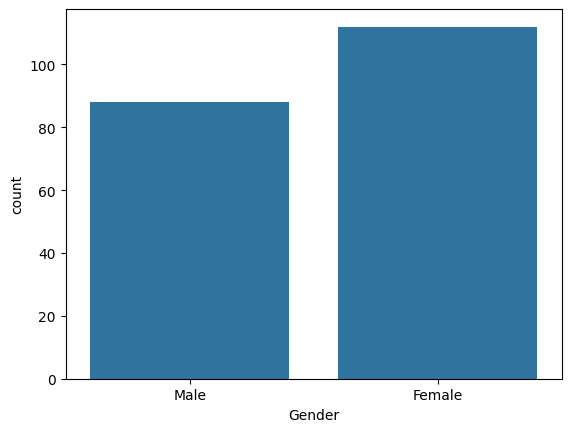

In [282]:
sns.countplot(x=df['Gender'],data=df)

In [283]:
df.drop(['CustomerID','Gender'],axis=1,inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [284]:
#input
x=df.iloc[:,:]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [285]:
#Number of Clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    data=KMeans(n_clusters=i,init='k-means++',random_state=42)
    data.fit(x)
    wcss.append(data.inertia_)

In [286]:
wcss

[308812.77999999997,
 221087.19627192983,
 158744.97108013937,
 104366.15145556201,
 97211.84353980477,
 68275.94428646986,
 51448.361262593244,
 44640.02804853042,
 42081.855308685306,
 38378.73890793208]

([<matplotlib.axis.XTick at 0x23355de3520>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

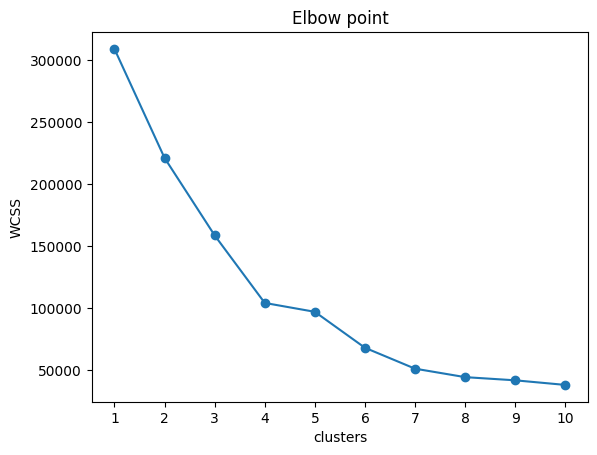

In [287]:
#Number of Clusters--->Elbow points
x1=[1,2,3,4,5,6,7,8,9,10]
plt.plot(x1,wcss,marker='o')
plt.xlabel('clusters')
plt.ylabel('WCSS')
plt.title('Elbow point')
plt.xticks([1,2,3,4,5,6,7,8,9,10])

We can choose 7 as the elbow point, so we can take the value of K as 7.

In [288]:
data1=KMeans(n_clusters=7,init='k-means++',random_state=42)
y_pred=data1.fit_predict(x)
y_pred

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6,
       0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6,
       6, 0, 0, 6, 0, 6, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 4, 6, 4, 6, 4, 3, 4, 3, 4,
       6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [289]:
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Combine y_pred with x.

In [290]:
x['cluster']=y_pred

In [291]:
x

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [292]:
#score after clustering
#Silhouette score
#Davies-Bouldin index
from sklearn.metrics import  silhouette_score,davies_bouldin_score
score=silhouette_score(x,y_pred)
score1=davies_bouldin_score(x,y_pred)
print(score)
print(score1)

0.44809866306076435
0.7610616975456105


In [293]:
i=x.iloc[:,:-1].values
o=x.iloc[:,-1].values

In [294]:
i.ndim

2

In [295]:
o.ndim

1

In [296]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(i,o,test_size=0.30,random_state=1)

In [297]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [298]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
pred

array([6, 0, 5, 0, 3, 3, 6, 5, 2, 3, 4, 5, 2, 0, 0, 0, 4, 2, 3, 0, 6, 5,
       5, 6, 2, 3, 5, 5, 1, 2, 6, 4, 3, 4, 3, 6, 3, 0, 6, 3, 0, 0, 4, 5,
       0, 2, 6, 2, 4, 6, 0, 4, 0, 0, 2, 4, 4, 0, 1, 3], dtype=int32)

In [299]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc=accuracy_score(y_test,pred)
acc

0.9833333333333333

In [300]:
cm=confusion_matrix(y_test,pred)
cm

array([[14,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  1,  0,  0],
       [ 0,  0,  8,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  9]])